In [12]:
from os import path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
# read the text:
dir = "DATA"
text = open(dir+'/Foundation_integral.txt').read()

In [14]:
text[:1000]

'FOUNDATION \nISAAC ASIMOV \n\n\nContents \n\nIntroduction \n\nPart I The Psvchohistorians \n\nPart II The Encyclopedists \n\nPart III The Mayors \n\nPart IV The Traders \n\nPart V The Merchant Princes \n\nPART I \n\nTHE PSYCHOHISTORIANS \n\ni. \n\nHARI SELDON-... bom In the 1 1,988th year of the Galactic Era; died 12,069. The dates are \nmore commonly given In terms of the current Foundational Era as - 79 to the year 1 F.E. Born \nto middle-class parents on Flelicon, Arcturus sector (where his father, In a legend of doubtful \nauthenticity, was a tobacco grower in the hydroponic plants of the planet), he early showed \namazing ability in mathematics. Anecdotes concerning his ability are innumerable, and some \nare contradictory. At the age of two, he is said to have ... \n\n... Undoubtedly his greatest contributions were in the field of psychohistory. Seldon found the \nfield little more than a set of vague axioms; he left it a profound statistical science.... \n\n... The best existin

In [15]:
# It seems we just have to remove some \n
clean_text = re.sub('\n', '', text)
clean_text[:1000]

'FOUNDATION ISAAC ASIMOV Contents Introduction Part I The Psvchohistorians Part II The Encyclopedists Part III The Mayors Part IV The Traders Part V The Merchant Princes PART I THE PSYCHOHISTORIANS i. HARI SELDON-... bom In the 1 1,988th year of the Galactic Era; died 12,069. The dates are more commonly given In terms of the current Foundational Era as - 79 to the year 1 F.E. Born to middle-class parents on Flelicon, Arcturus sector (where his father, In a legend of doubtful authenticity, was a tobacco grower in the hydroponic plants of the planet), he early showed amazing ability in mathematics. Anecdotes concerning his ability are innumerable, and some are contradictory. At the age of two, he is said to have ... ... Undoubtedly his greatest contributions were in the field of psychohistory. Seldon found the field little more than a set of vague axioms; he left it a profound statistical science.... ... The best existing authority we have for the details of his life is the biography wri

In [16]:
# read the mask image:
mask = np.array(Image.open(dir+"/asimov_stencil_HR.png"))
image_colors = ImageColorGenerator(mask)

In [17]:
stopwords = set(STOPWORDS)

In [18]:
wc = WordCloud(
    width=1600, 
    height=800, 
    scale=4,
    background_color="white", 
    mask=mask, 
    max_words=400,
    stopwords=stopwords, 
    contour_width=10, 
    contour_color='black',
    colormap='twilight'
)

In [19]:
# generate word cloud
wc.generate(clean_text)

In [20]:
# store to file
wc.to_file(dir+"/foundation.png")

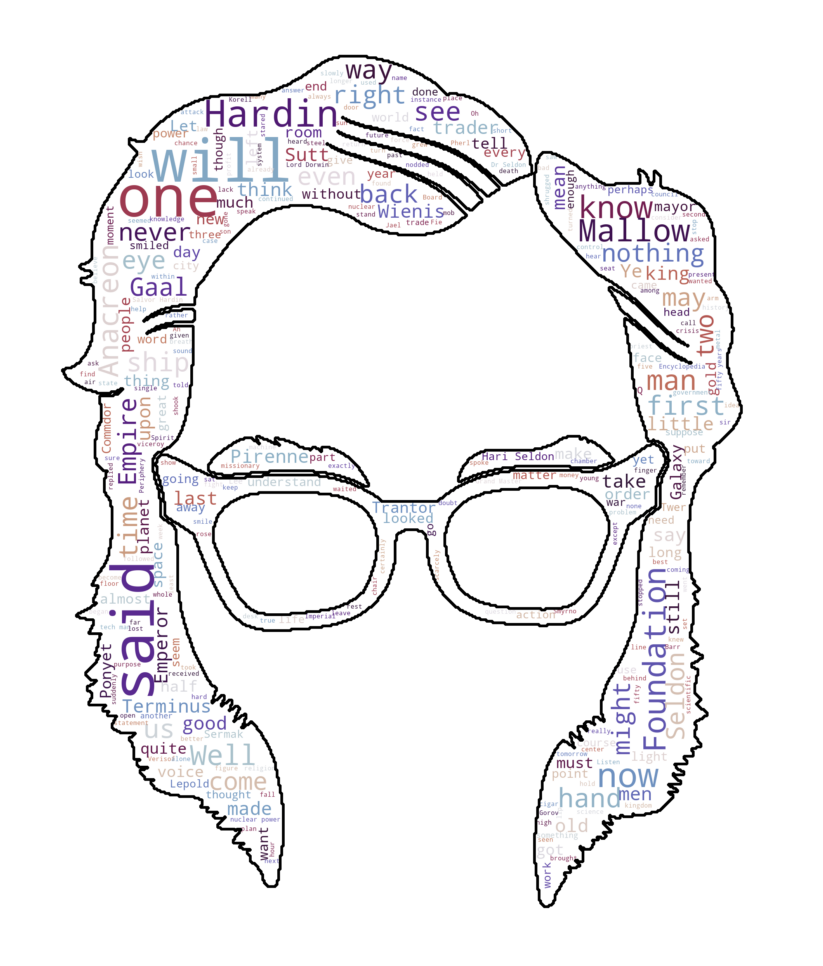

In [21]:
# show
fig = plt.figure(dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()